In [ ]:
# ----------------------------------------
# 🧠 AI Data Analyst Chatbot using Groq API
# ----------------------------------------
# This script sends a user's natural language question to the Groq LLM,
# receives Python pandas code in return, auto-executes it, and displays results.

Generated and corrected Python code:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv('house_data.csv')

# Extract the price column
prices = df['price']

# Get summary statistics
print(prices.describe())

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram
sns.histplot(prices, ax=axes[0], bins=20, kde=True)
axes[0].set_title('Distribution of House Prices (Histogram)')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

# Boxplot
sns.boxplot(prices, ax=axes[1])
axes[1].set_title('Distribution of House Prices (Boxplot)')
axes[1].set_xlabel('Price')

plt.tight_layout()
plt.show()

--- Executing code below ---

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


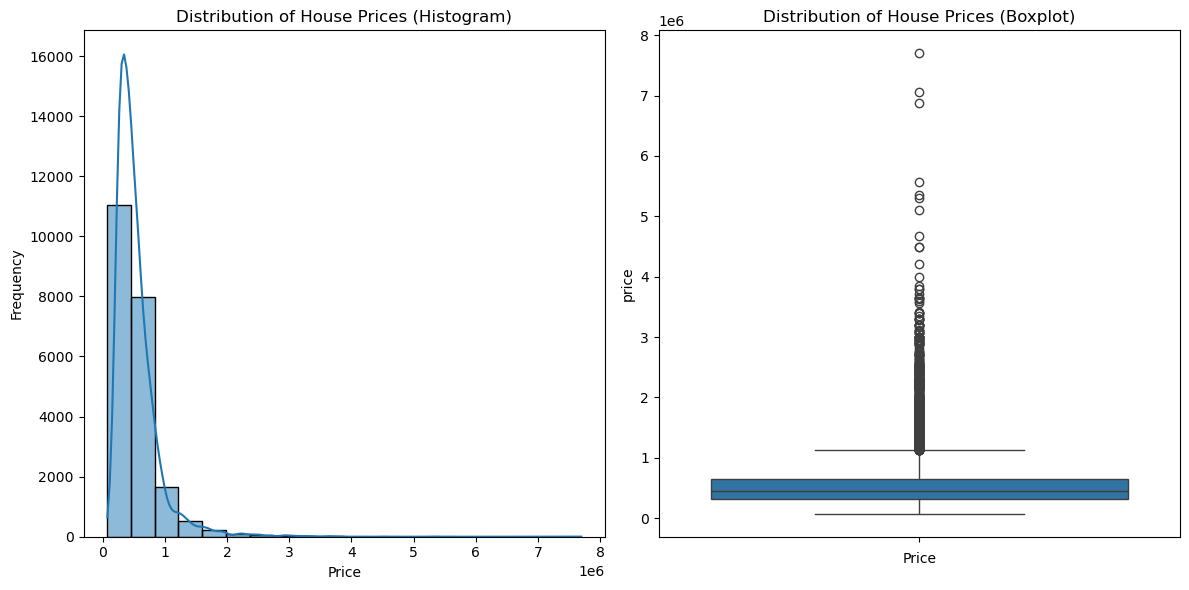

In [15]:
# 1. Imports and API Client Setup
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from openai import OpenAI
import seaborn as sns


# Set your Groq API key directly (replace with your real key)
api_key = "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"  # <--- Replace with your actual key

client = OpenAI(
    base_url="https://api.groq.com/openai/v1",
    api_key=api_key,
)

# 2. Helper Functions

def generate_code_from_prompt(dataset_desc, analysis_request):
    prompt = f"""
    Dataset Description:
    {dataset_desc}

    Please provide Python pandas code to {analysis_request}.
    Only provide the code, no explanations.
    """
    response = client.chat.completions.create(
        model="deepseek-r1-distill-llama-70b",
        messages=[{"role": "user", "content": prompt}],
    )
    return response.choices[0].message.content

def replace_csv_filename(code, actual_filename='house_data.csv'):
    """
    Replace any CSV filename in the generated code with the actual filename.
    """
    pattern = r"pd\.read_csv\(['\"]([^'\"]+\.csv)['\"]\)"
    updated_code = re.sub(pattern, f"pd.read_csv('{actual_filename}')", code)
    return updated_code

import re

def extract_code_from_markdown(text):
    """
    Extracts Python code from markdown code blocks like ```python ... ``` or ```...```.
    If no code block is found, returns the original text.
    """
    # Look for triple backtick blocks with or without "python"
    match = re.search(r"```(?:python)?\s*(.*?)```", text, re.DOTALL)
    if match:
        return match.group(1).strip()
    return text.strip()

# 3. Main Function

def run_analysis_prompt(dataset_description, analysis_prompt, dataset_filename='house_data.csv'):
    # Step 1: Generate code from the model
    code = generate_code_from_prompt(dataset_description, analysis_prompt)
    
    # Step 2: Replace any generic filename with the correct one
    corrected_code = replace_csv_filename(code, dataset_filename)
    
    # Step 3: Extract raw Python code (strip markdown)
    python_code = extract_code_from_markdown(corrected_code)
    
    print("Generated and corrected Python code:\n")
    print(python_code)
    print("\n--- Executing code below ---\n")
    
    # Step 4: Run the cleaned code
    try:
        exec(python_code, globals())
    except Exception as e:
        print("❌ Error during execution:", e)

# 4. Example Usage

dataset_description = """
HRDataset with 311 rows and 36 columns including:
- id, date, price, bedrooms, bathrooms, sqft_living,
     sqft_lot, floors, waterfront, view, condition, grade,
     sqft_above, sqft_basement, yr_built, yr_renovated,
     zipcode, lat, long, sqft_living15, sqft_lot15
"""

analysis_prompt = "What is the distribution of house prices? Provide histogram and boxplot."


run_analysis_prompt(dataset_description, analysis_prompt)


Generated and corrected Python code:

import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv('house_data.csv')

# Count the number of houses built each year
yr_built_counts = df['yr_built'].value_counts().sort_index()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(yr_built_counts.index, yr_built_counts.values, marker='o')
plt.title('Number of Houses Built Each Year')
plt.xlabel('Year Built')
plt.ylabel('Count')
plt.grid(True)
plt.show()

--- Executing code below ---



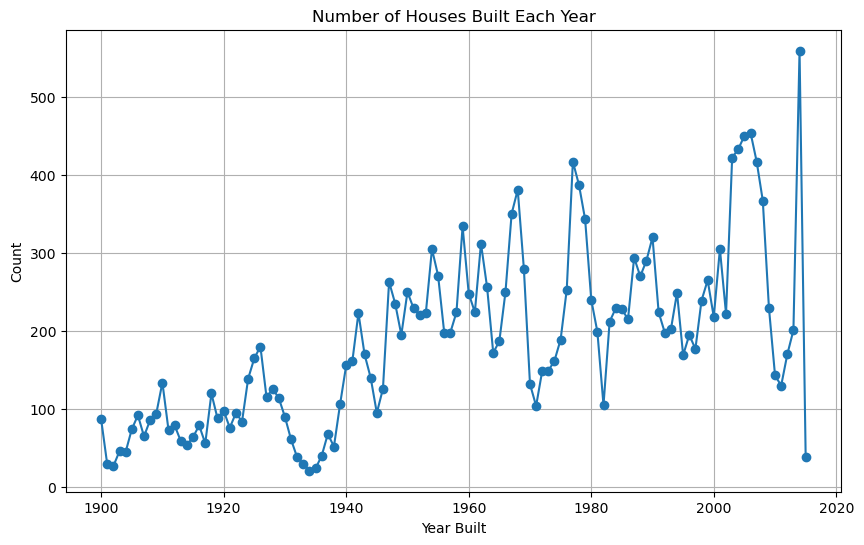

In [16]:

analysis_prompt = "How many houses were built each year? Plot a line chart over 'yr_built'"


run_analysis_prompt(dataset_description, analysis_prompt)

Generated and corrected Python code:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('house_data.csv')

# Create a scatter plot of bedrooms vs price
plt.figure(figsize=(10,6))
sns.scatterplot(x='bedrooms', y='price', data=df, hue='bedrooms', palette='viridis')

# Add regression line
sns.regplot(x='bedrooms', y='price', data=df, ci=None, color='red')

# Customize the plot
plt.title('Relationship Between Bedrooms and Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

--- Executing code below ---



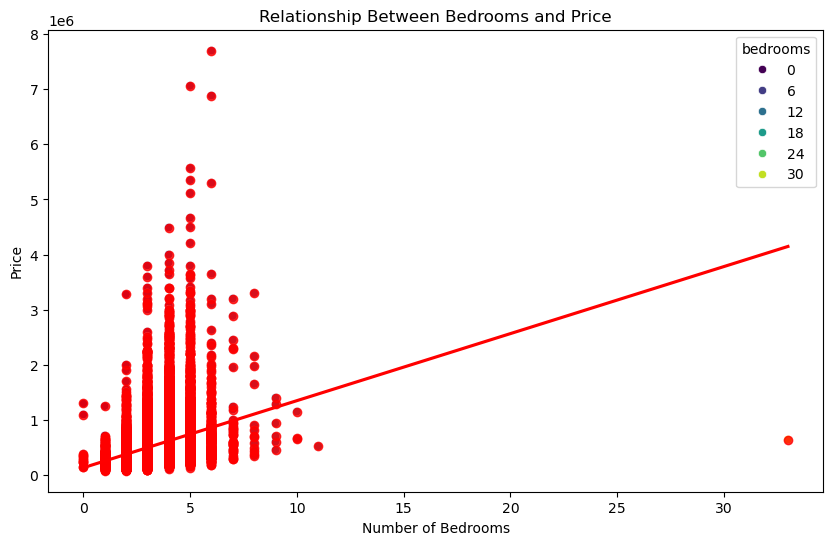

In [19]:
analysis_prompt = "Visualize the relationship between the number of bedrooms and price."


run_analysis_prompt(dataset_description, analysis_prompt)

Generated and corrected Python code:

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('house_data.csv')

# Group by number of bathrooms and calculate average price
average_price = df.groupby('bathrooms')['price'].mean()

# Create the plot
plt.figure(figsize=(10,6))
average_price.plot(kind='bar')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Average Price')
plt.title('Average Price per Number of Bathrooms')
plt.show()

--- Executing code below ---



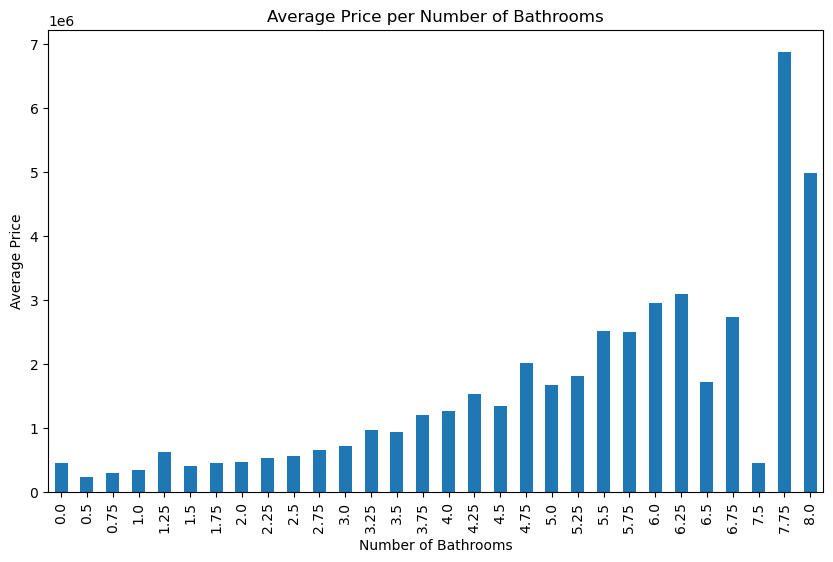

In [20]:
analysis_prompt = "Plot average price per number of bathrooms."


run_analysis_prompt(dataset_description, analysis_prompt)

Generated and corrected Python code:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('house_data.csv')

# Group by number of floors and calculate average price
avg_price_by_floors = df.groupby('floors')['price'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(10,6))
sns.lineplot(data=avg_price_by_floors, x='floors', y='price')
plt.title('Average Price Trend by Number of Floors')
plt.xlabel('Number of Floors')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

# Create a box plot
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='floors', y='price')
plt.title('Price Distribution by Number of Floors')
plt.xlabel('Number of Floors')
plt.ylabel('Price')
plt.grid(True)
plt.show()

--- Executing code below ---



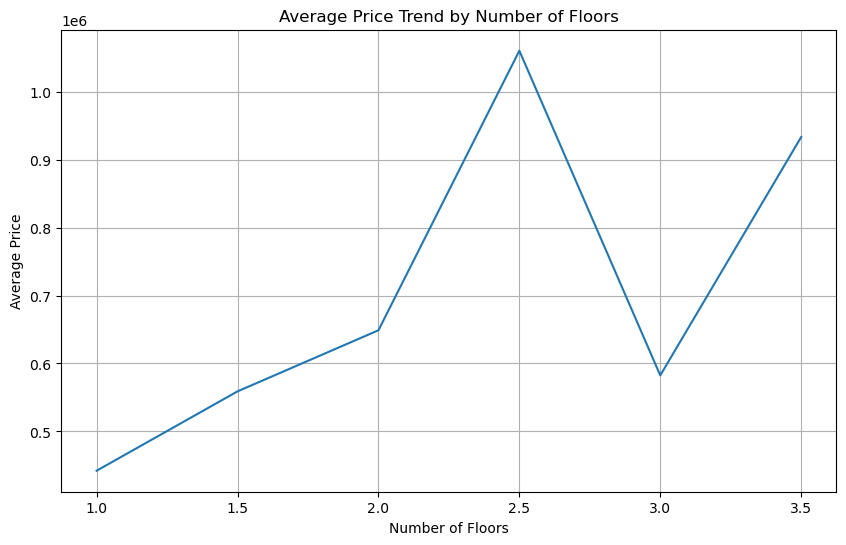

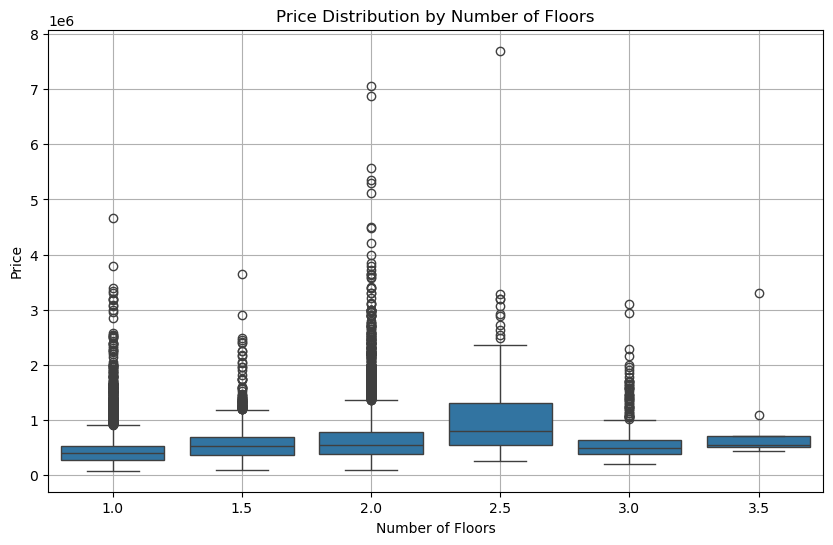

In [26]:
analysis_prompt = "show price trends by number of floors."


run_analysis_prompt(dataset_description, analysis_prompt)

Generated and corrected Python code:

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('house_data.csv')

# Calculate correlation
correlation = df['sqft_living'].corr(df['price'])
print(f"Correlation between sqft_living and price: {correlation}")

# Create scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df['sqft_living'], df['price'])
plt.title('Scatter Plot of sqft_living vs price')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.grid(True)
plt.show()

--- Executing code below ---

Correlation between sqft_living and price: 0.7020350546118004


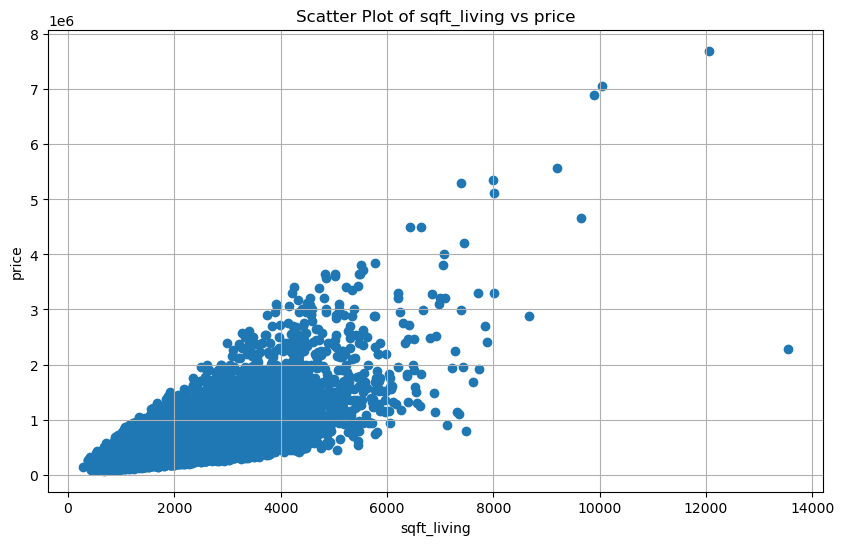

In [27]:
analysis_prompt = "Analyze correlation between 'sqft_living' and 'price' with a scatter plot."


run_analysis_prompt(dataset_description, analysis_prompt)

Generated and corrected Python code:

import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv('house_data.csv')

# Create a figure
plt.figure(figsize=(10,6))

# Plot the distribution of 'sqft_lot'
df['sqft_lot'].plot.hist(bins=50, alpha=0.5, color='skyblue', edgecolor='black', label='sqft_lot')
plt.title('Distribution of Lot Sizes')
plt.xlabel('Square Footage of Lot')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

--- Executing code below ---



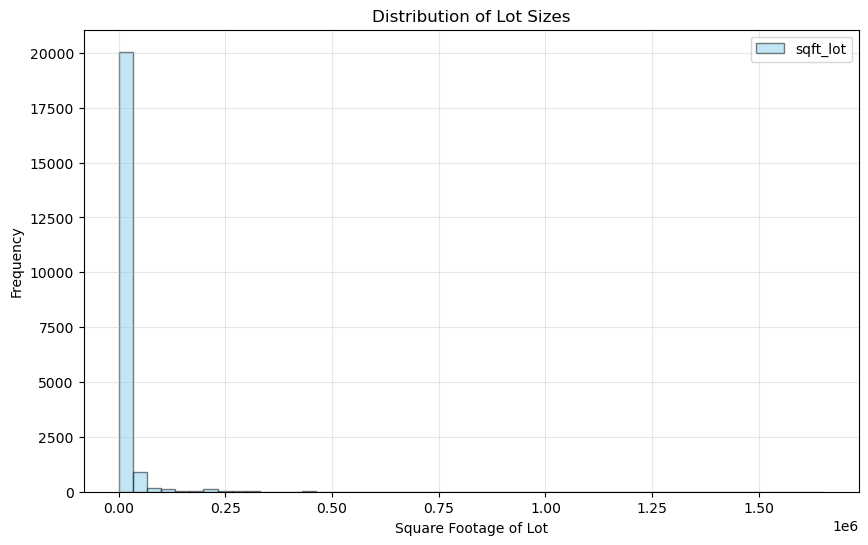

In [28]:
analysis_prompt = "Plot distribution of 'sqft_lot' sizes"


run_analysis_prompt(dataset_description, analysis_prompt)

Generated and corrected Python code:

import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv('house_data.csv')

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot average sqft_above vs sqft_basement
ax1.bar(['Above', 'Basement'], [df['sqft_above'].mean(), df['sqft_basement'].mean()])
ax1.set_xlabel('Area Type')
ax1.set_ylabel('Average Square Footage')
ax1.set_title('Average Square Footage Comparison')
ax1.grid(True)

# Plot total sqft_above vs sqft_basement
total_above = df['sqft_above'].sum()
total_basement = df['sqft_basement'].sum()
ax2.bar(['Above', 'Basement'], [total_above, total_basement])
ax2.set_xlabel('Area Type')
ax2.set_ylabel('Total Square Footage')
ax2.set_title('Total Square Footage Comparison')
ax2.grid(True)

# Layout so plots do not overlap
plt.tight_layout()
plt.show()

--- Executing code below ---



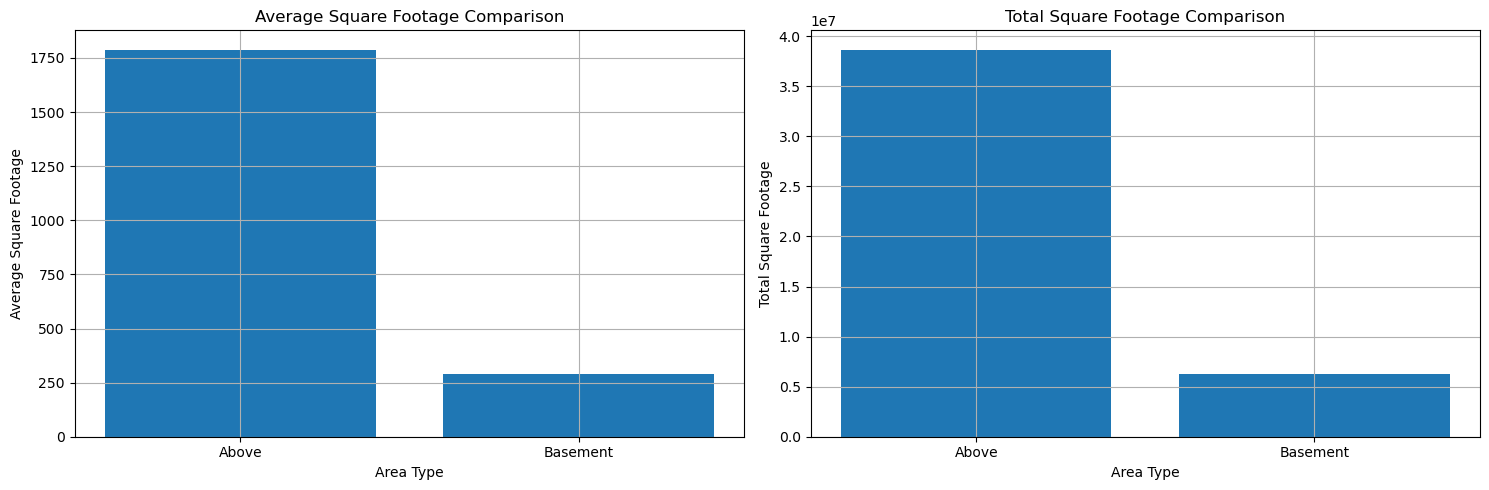

In [29]:
analysis_prompt = "Compare 'sqft_above' vs 'sqft_basement' sizes with bar charts."


run_analysis_prompt(dataset_description, analysis_prompt)

Generated and corrected Python code:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the dataset
df = pd.read_csv('house_data.csv')

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot price vs sqft_living15
ax1.scatter(df['sqft_living15'], df['price'])
ax1.set_xlabel('sqft_living15')
ax1.set_ylabel('Price')
ax1.set_title('Price vs Living Area (15)')
ax1.grid(True)

# Plot price vs sqft_lot15
ax2.scatter(df['sqft_lot15'], df['price'])
ax2.set_xlabel('sqft_lot15')
ax2.set_ylabel('Price')
ax2.set_title('Price vs Lot Area (15)')
ax2.grid(True)

# Add regression line for both plots
z1 = np.polyfit(df['sqft_living15'], df['price'], 1)
p1 = np.poly1d(z1)
ax1.plot(df['sqft_living15'], p1(df['sqft_living15']), "r--")

z2 = np.polyfit(df['sqft_lot15'], df['price'], 1)
p2 = np.poly1d(z2)
ax2.plot(df['sqft_lot15'], p2(df['sqft_lot15']), "r--")

plt.tight_layout()
plt.show()

--- Executing code below ---



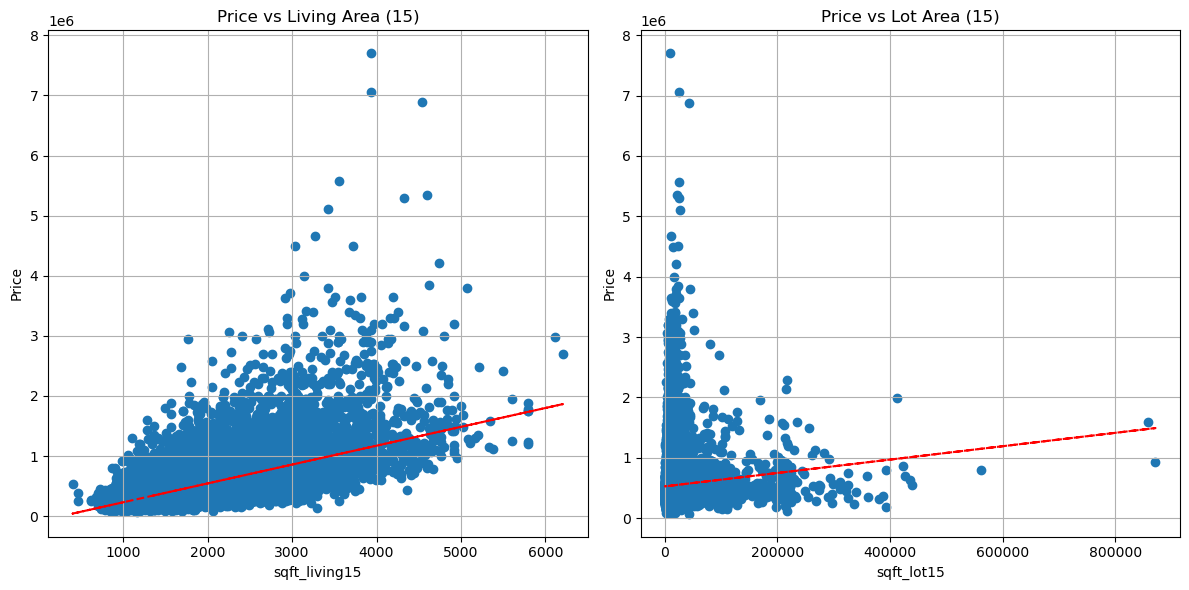

In [30]:
analysis_prompt = "Visualize price against 'sqft_living15' and 'sqft_lot15' features."


run_analysis_prompt(dataset_description, analysis_prompt)

In [31]:
analysis_prompt = "Show the count of houses by condition."


run_analysis_prompt(dataset_description, analysis_prompt)

Generated and corrected Python code:

import pandas as pd

# Read the dataset
df = pd.read_csv('house_data.csv')

# Count of houses by condition
counts = df['condition'].value_counts()

# Display the counts
print(counts)

--- Executing code below ---

condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64


Generated and corrected Python code:

import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv('house_data.csv')

# Group by 'grade' and calculate average price
average_price_by_grade = df.groupby('grade')['price'].mean().reset_index()

# Create bar chart
plt.figure(figsize=(10,6))
plt.bar(average_price_by_grade['grade'], average_price_by_grade['price'], color='skyblue')
plt.title('Average Price by House Grade')
plt.xlabel('Grade')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

--- Executing code below ---



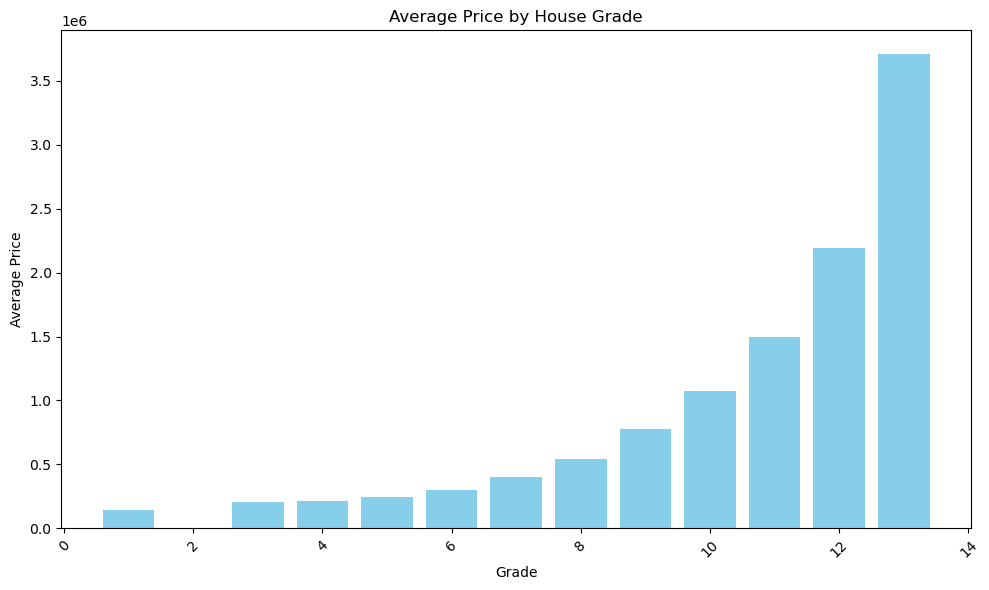

In [32]:
analysis_prompt = "Visualize average price by house grade with a bar chart."


run_analysis_prompt(dataset_description, analysis_prompt)

Generated and corrected Python code:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns

# Load the dataset
data = pd.read_csv('house_data.csv')

# Drop rows with missing values in relevant columns
data.dropna(subset=['price', 'condition', 'grade'], inplace=True)

# Convert condition and grade to numerical values if they are categorical
le = LabelEncoder()
data['condition'] = le.fit_transform(data['condition'])
data['grade'] = le.fit_transform(data['grade'])

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Box plots for price distribution by condition and grade
sns.boxplot(x='condition', y='price', data=data, ax=ax1)
ax1.set_title('Price Distribution by Condition')
ax1.set_xlabel('Condition')
ax1.set_ylabel('Price')

sns.boxplot(x

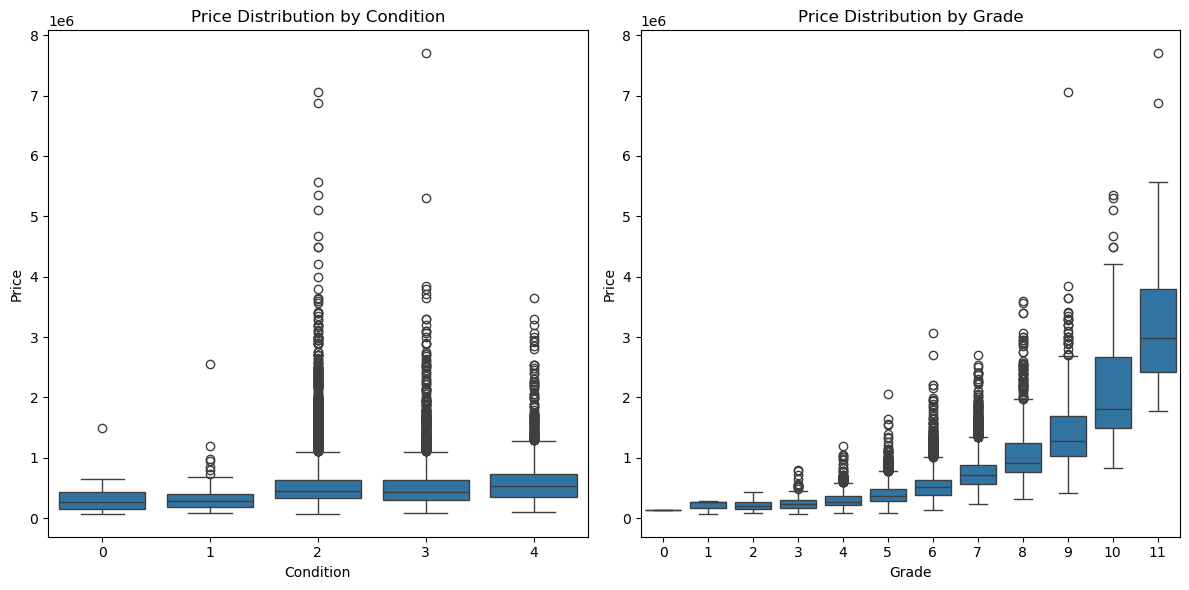

Correlation Matrix:
              price  condition     grade
price      1.000000   0.036362  0.667529
condition  0.036362   1.000000 -0.144849
grade      0.667529  -0.144849  1.000000

Variance Inflation Factors (VIF):
   VIF Factor     features
0   10.424640    condition
1   31.062909        grade
2   18.620633  sqft_living
3    1.177052     sqft_lot
4   18.863108     bedrooms
5   21.774949    bathrooms

Regression Coefficients:
              Coefficients
condition     64703.602684
grade        102325.657120
sqft_living     224.079257
sqft_lot         -0.322113
bedrooms     -44788.583772
bathrooms    -18916.235289

Summary of Impact Analysis:
           Correlation with Price  Regression Coefficient        VIF
Condition                0.036362            64703.602684  10.424640
Grade                    0.667529           102325.657120  31.062909


In [33]:
analysis_prompt = "Analyze if better condition or grade impacts price more"


run_analysis_prompt(dataset_description, analysis_prompt)

Generated and corrected Python code:

import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv('house_data.csv')

# Count the number of houses renovated per year
renovation_counts = df[df['yr_renovated'] != 0]['yr_renovated'].value_counts().sort_index()

# Create the plot
plt.figure(figsize=(10,6))
renovation_counts.plot(kind='bar')
plt.title('Number of Houses Renovated by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

--- Executing code below ---



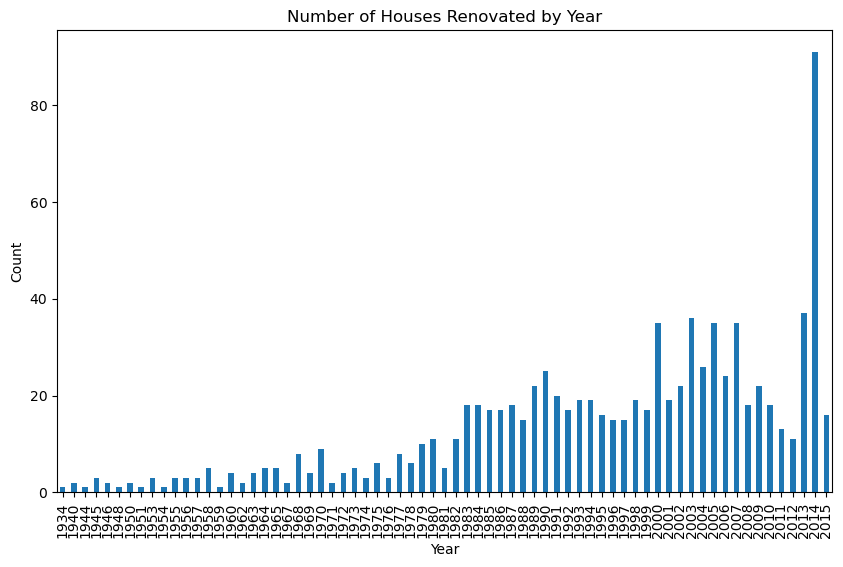

In [34]:
analysis_prompt = "Plot the number of houses renovated by year ('yr_renovated')."


run_analysis_prompt(dataset_description, analysis_prompt)

Generated and corrected Python code:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv('house_data.csv')

# Convert 'yr_built' to numeric
df['yr_built'] = pd.to_numeric(df['yr_built'])

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(x='yr_built', y='price', data=df, ci=None)

# Add labels and title
plt.title('Impact of House Age (yr_built) on Price')
plt.xlabel('Year Built')
plt.ylabel('Price')

# Display the plot
plt.show()

--- Executing code below ---



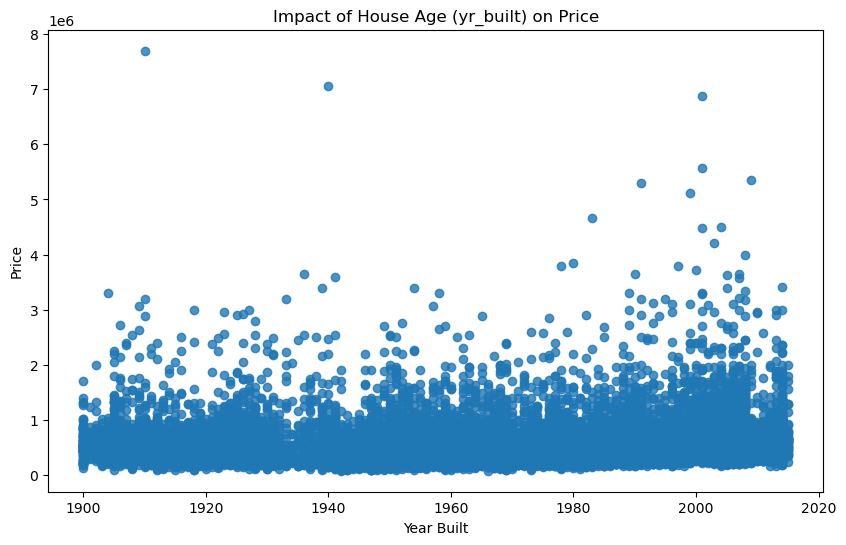

In [35]:
analysis_prompt = "Visualize the impact of house age ('yr_built') on price"


run_analysis_prompt(dataset_description, analysis_prompt)

Generated and corrected Python code:

import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv('house_data.csv')

# Create a renovated column (assuming yr_renovated > 0 means renovated)
df['renovated'] = df['yr_renovated'] > 0

# Group by renovated status and calculate price statistics
renovated_stats = df.groupby('renovated')['price'].agg(['mean', 'median', 'min', 'max'])

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot mean prices
ax1.bar(renovated_stats.index.map({True: 'Renovated', False: 'Non-Renovated'}), renovated_stats['mean'])
ax1.set_title('Average Prices')
ax1.set_xlabel('Renovation Status')
ax1.set_ylabel('Price')

# Plot median prices
ax2.bar(renovated_stats.index.map({True: 'Renovated', False: 'Non-Renovated'}), renovated_stats['median'])
ax2.set_title('Median Prices')
ax2.set_xlabel('Renovation Status')
ax2.set_ylabel('Price')

plt.tight_layout()
plt.show()

--- Executing code below ---



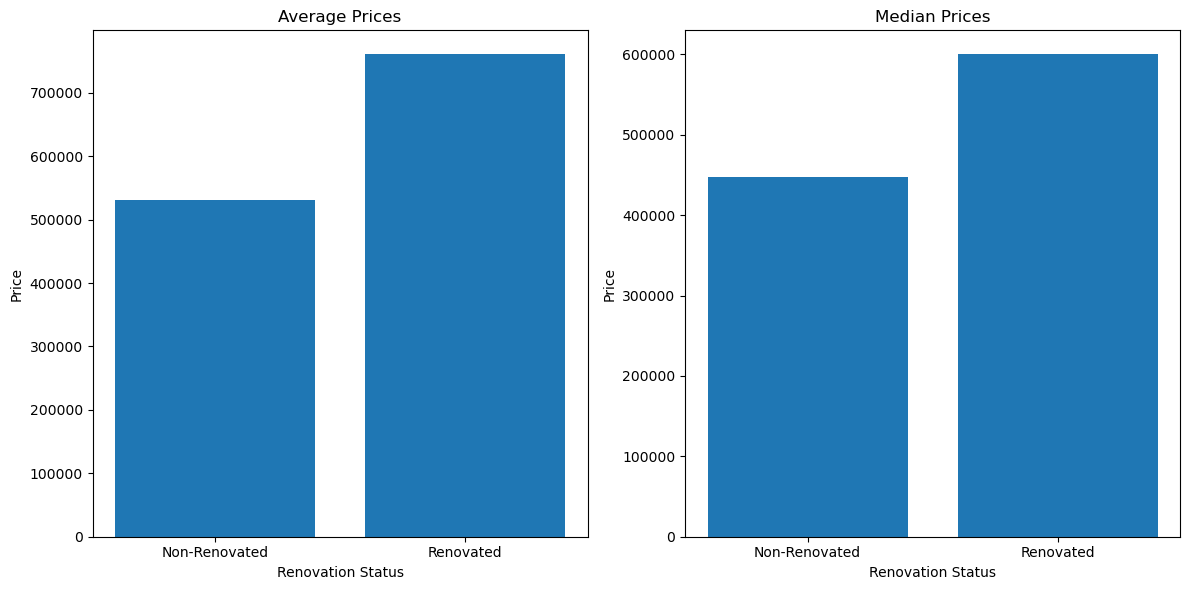

In [36]:
analysis_prompt = "Compare prices for renovated vs non-renovated houses."


run_analysis_prompt(dataset_description, analysis_prompt)

Generated and corrected Python code:

import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv('house_data.csv')

# Create scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['long'], df['lat'], c=df['price'], cmap='viridis')

# Customize the plot
plt.colorbar(scatter, label='Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('House Locations Colored by Price')

# Display the plot
plt.show()

--- Executing code below ---



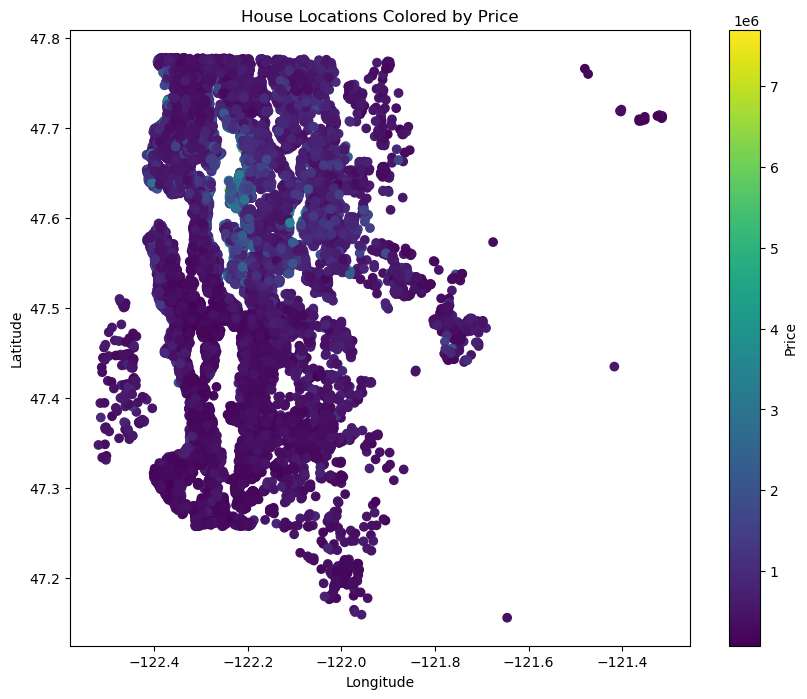

In [37]:
analysis_prompt = "Create a scatter plot of house locations by 'lat' and 'long' colored by price"


run_analysis_prompt(dataset_description, analysis_prompt)

Generated and corrected Python code:

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('house_data.csv')

# Group by zipcode and calculate average price
average_prices = df.groupby('zipcode')['price'].mean().reset_index()

# Create bar chart
plt.figure(figsize=(10,6))
plt.bar(average_prices['zipcode'], average_prices['price'])
plt.xlabel('Zipcode')
plt.ylabel('Average Price')
plt.title('Average House Price by Zipcode')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

--- Executing code below ---



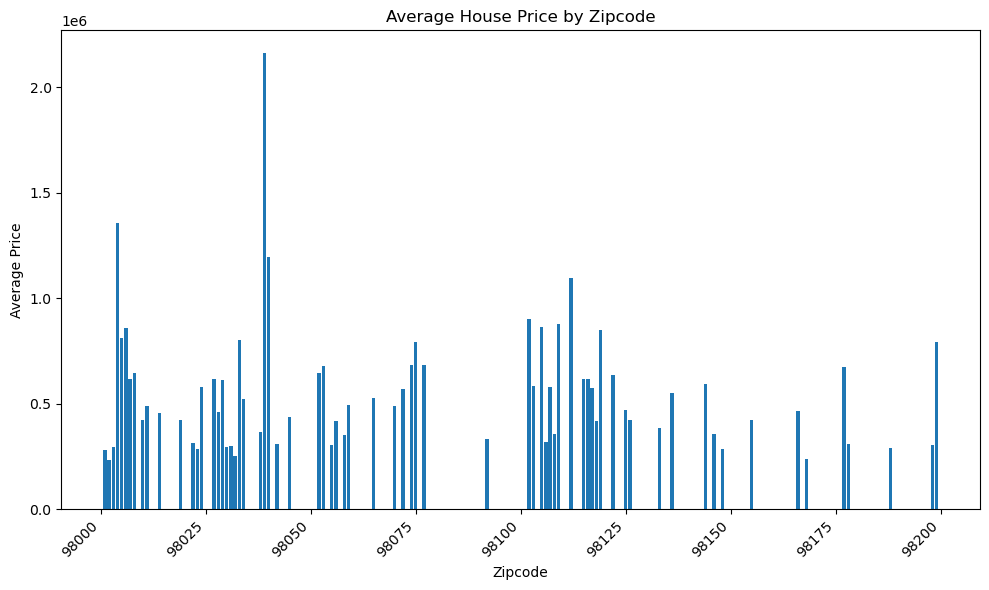

In [38]:
analysis_prompt = "Show average house price by zipcode in a bar chart."


run_analysis_prompt(dataset_description, analysis_prompt)

Generated and corrected Python code:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv('house_data.csv')

# Create a boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='waterfront', y='price', data=df)

# Set labels and title
plt.title('Boxplot of House Prices by Waterfront')
plt.xlabel('Waterfront')
plt.ylabel('Price')

# Show plot
plt.show()

--- Executing code below ---



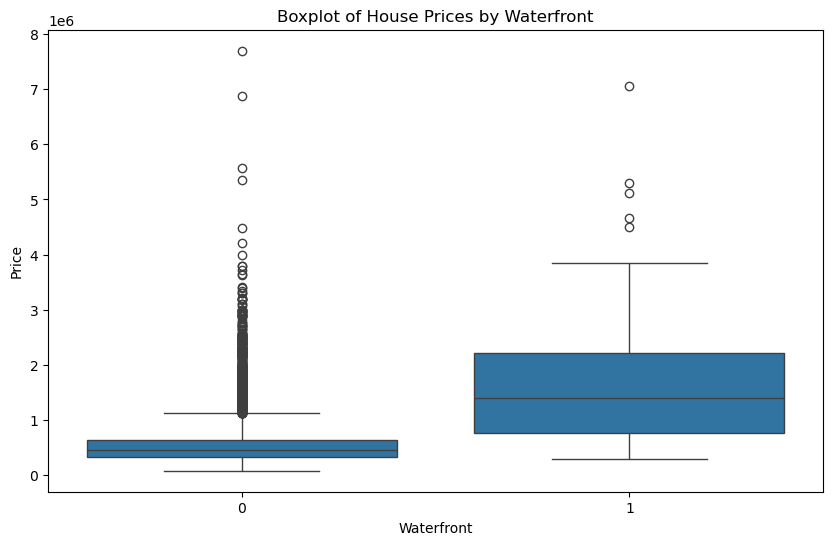

In [39]:
analysis_prompt = "Are waterfront properties priced higher? Show boxplots grouped by 'waterfront'."


run_analysis_prompt(dataset_description, analysis_prompt)

Generated and corrected Python code:

import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv('house_data.csv')

# Check unique values in 'view' column
print("Unique values in 'view' column:", df['view'].unique())

# Create a boxplot to show the distribution of prices by view
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.boxplot([df[df['view']==v]['price'] for v in df['view'].unique()], 
             labels=df['view'].unique())
plt.title('Boxplot of House Prices by View')
plt.xlabel('View')
plt.ylabel('Price')
plt.grid(True)

# Create a bar plot to show the mean price by view
mean_prices = df.groupby('view')['price'].mean().reset_index()
plt.subplot(1,2,2)
plt.bar(mean_prices['view'], mean_prices['price'], color='skyblue')
plt.title('Mean House Prices by View')
plt.xlabel('View')
plt.ylabel('Mean Price')
plt.grid(True)

# Layout so plots do not overlap
plt.tight_layout()
plt.show()

--- Executing code below ---

Unique values in 'view' column: [0 3 

<string>:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.


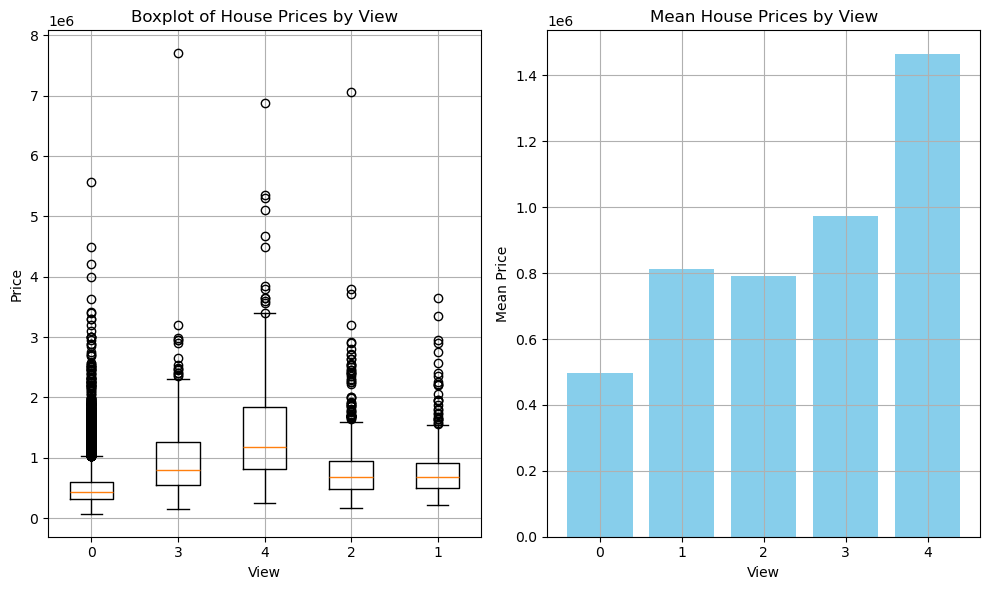

In [40]:
analysis_prompt = "Visualize the effect of 'view' on house price"


run_analysis_prompt(dataset_description, analysis_prompt)

Generated and corrected Python code:

import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv('house_data.csv')
print(df.head())

# Create boxplot for price
plt.figure(figsize=(10,6))
plt.boxplot(df['price'])
plt.title('Boxplot of Price')
plt.show()

# Calculate IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print("Outliers in Price:")
print(outliers)

# Display the boxplot again
plt.figure(figsize=(10,6))
plt.boxplot(df['price'], vert=False)
plt.title('Boxplot of Price with Outliers')
plt.show()

--- Executing code below ---

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3     

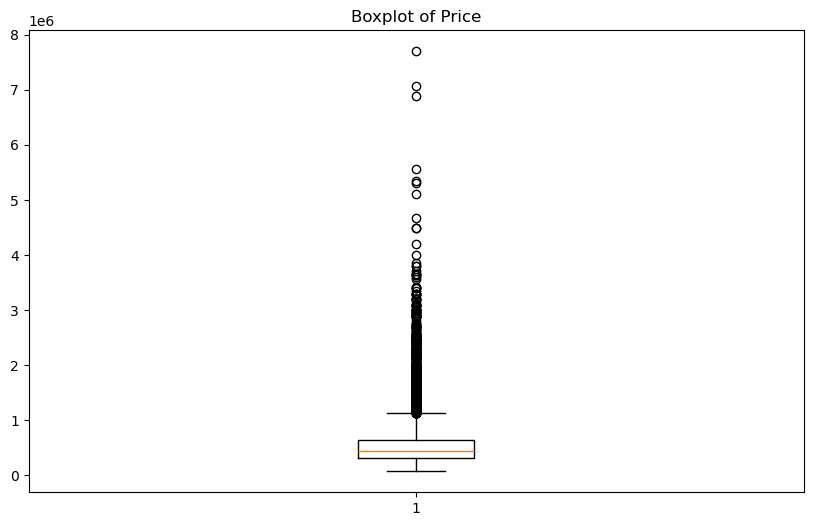

Outliers in Price:
               id             date      price  bedrooms  bathrooms  \
5      7237550310  20140512T000000  1225000.0         4       4.50   
21     2524049179  20140826T000000  2000000.0         3       2.75   
49      822039084  20150311T000000  1350000.0         3       2.50   
69     1802000060  20140612T000000  1325000.0         5       2.25   
125    4389200955  20150302T000000  1450000.0         4       2.75   
...           ...              ...        ...       ...        ...   
21568   524059330  20150130T000000  1700000.0         4       3.50   
21576  9253900271  20150107T000000  3567000.0         5       4.50   
21590  7430200100  20140514T000000  1222500.0         4       3.50   
21597   191100405  20150421T000000  1575000.0         4       3.25   
21600   249000205  20141015T000000  1537000.0         5       3.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
5             5420    101930     1.0           0     0  ...     11   


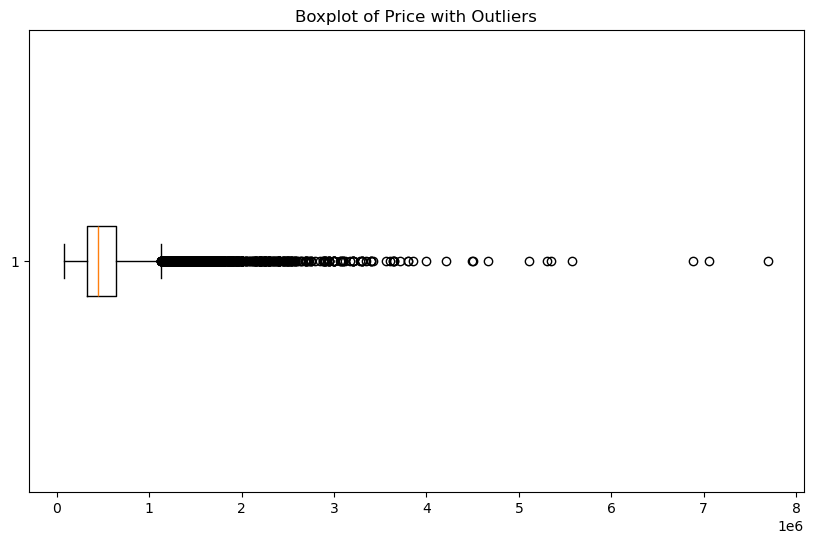

In [41]:
analysis_prompt = "Detect outliers in price using boxplots and IQR method."


run_analysis_prompt(dataset_description, analysis_prompt)

Generated and corrected Python code:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('house_data.csv')

# Select numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Create correlation matrix
corr_matrix = numeric_df.corr()

# Create heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

--- Executing code below ---



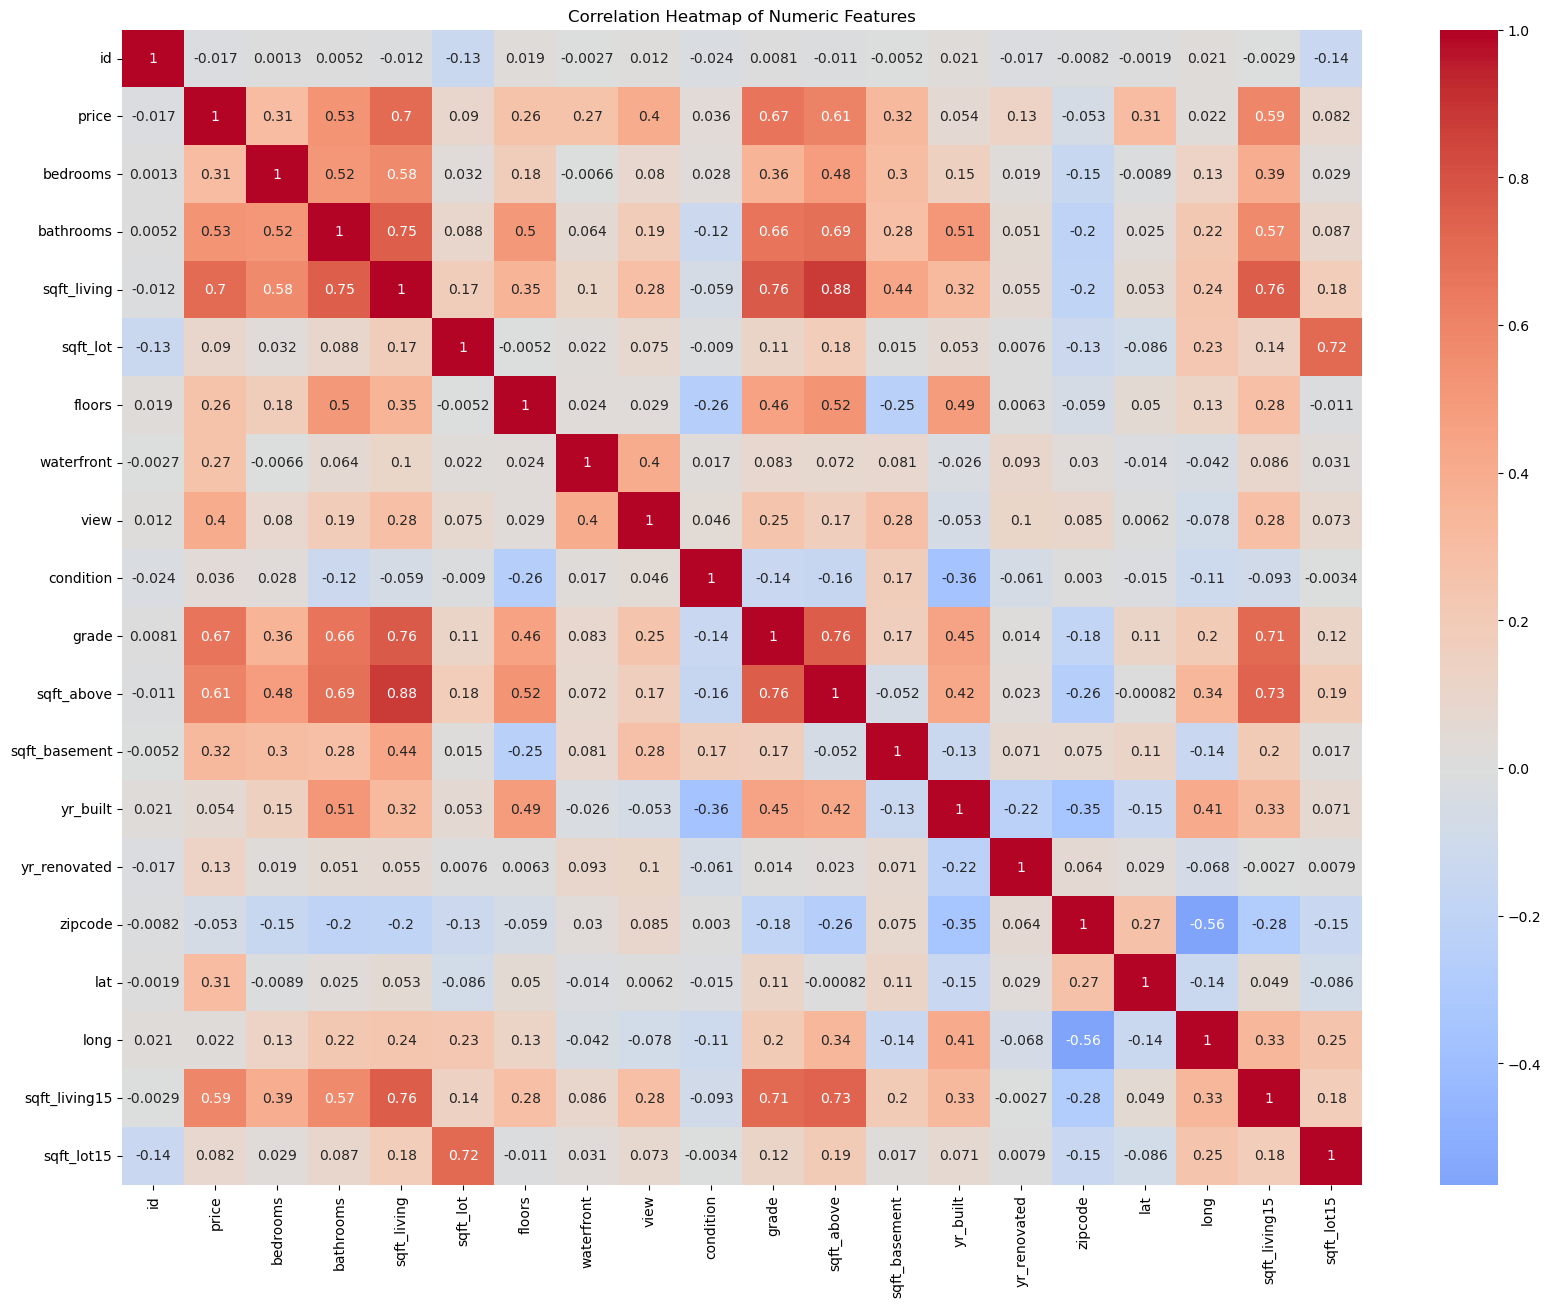

In [42]:
analysis_prompt = "Perform a correlation heatmap of all numeric features."


run_analysis_prompt(dataset_description, analysis_prompt)

Generated and corrected Python code:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('house_data.csv')

# Prepare the data for clustering
data = df[['price', 'sqft_living']]
data.dropna(inplace=True)  # Remove rows with missing values

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(1,11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Perform K-means clustering with optimal number of clusters
n_clusters = 3  # Adjust based on the elbow method result
kmeans = KMeans(n_clusters=n_clusters, rando

<string>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


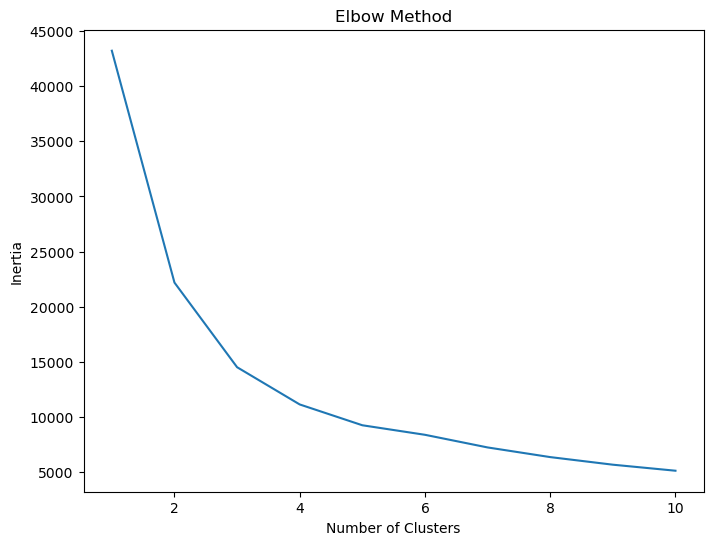

<string>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


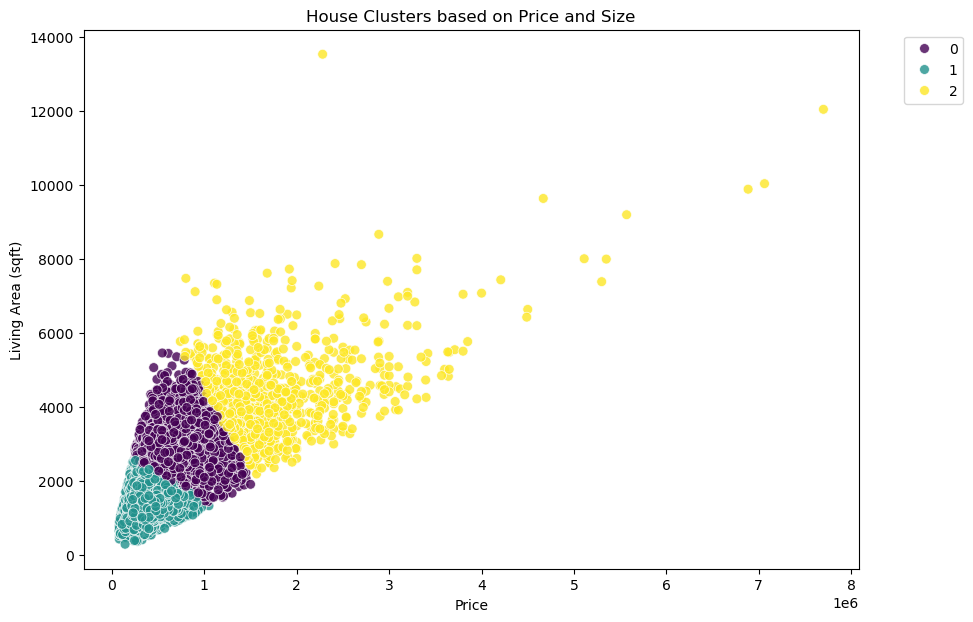

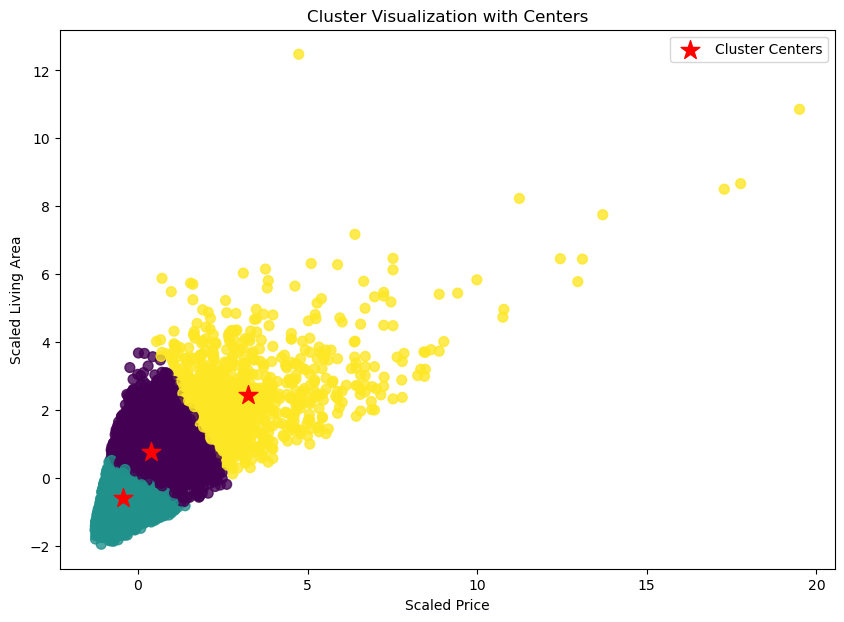

In [43]:
analysis_prompt = "Cluster houses based on size and price; visualize clusters"


run_analysis_prompt(dataset_description, analysis_prompt)

Generated and corrected Python code:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('house_data.csv')

# Check for missing values
print(df.isnull().sum())

# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

# Plot price trend over time
plt.figure(figsize=(10,6))
sns.lineplot(x='date', y='price', data=df)
plt.title('Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Prepare data for forecasting
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Create a new dataframe with date features
df_features = df.copy()
df_features['date'] = df_features.index
df_features['day'] = df_features['date'].dt.day
df_features['month'] = df_features['date'].dt.month
df_features['year'] = df_features['date'].

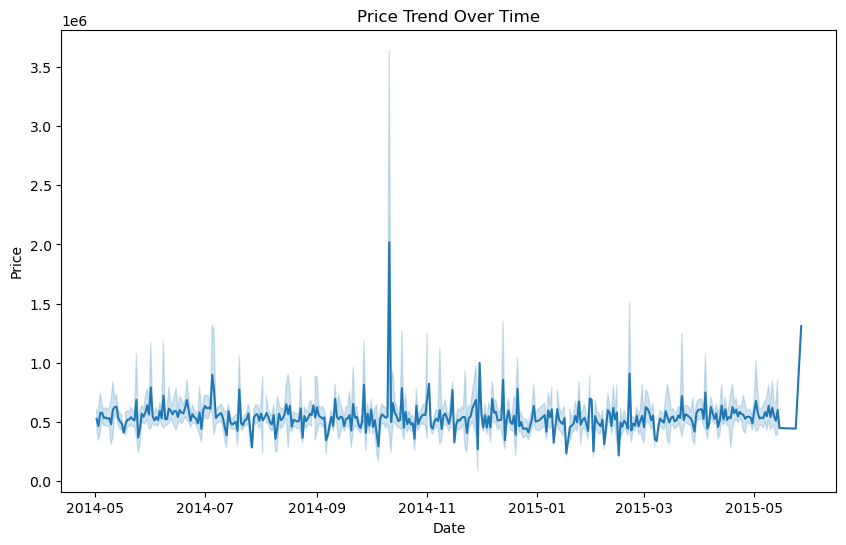

Mean Squared Error: 151306892680.32993
R-squared Score: -0.0008611142650869485


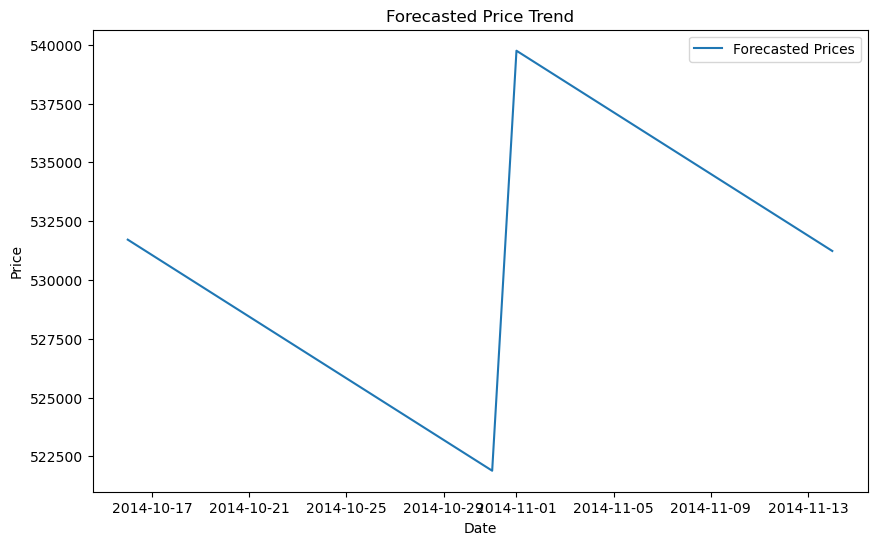

In [45]:
analysis_prompt = "Forecast price trends over the dates in the dataset."


run_analysis_prompt(dataset_description, analysis_prompt)

In [47]:
analysis_prompt = "What are the top 3 features that influence house price the most?"


run_analysis_prompt(dataset_description, analysis_prompt)

Generated and corrected Python code:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

# Load the dataset
df = pd.read_csv('house_data.csv')

# Calculate correlations with 'price'
correlations = df.corr()['price'].abs().sort_values(ascending=False)

# Display top correlations
print(correlations)

# Build a linear regression model
model = ols('price ~ sqft_living + bedrooms + bathrooms + sqft_lot + floors + grade', data=df).fit()
print(model.summary())

# Create a heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Top 3 features based on correlation
top_features = correlations.nlargest(3).index.tolist()
print(f'Top 3 features influencing house price: {top_features}')

--- Executing code below ---

❌ Error during execution: could not convert string to float: '20141013T000000'


In [49]:
analysis_prompt = "check date column is in proper datetime format and What are the top 3 features that influence house price the most?"


run_analysis_prompt(dataset_description, analysis_prompt)

Generated and corrected Python code:

import pandas as pd

# Load the dataset
df = pd.read_csv('house_data.csv')

# Check if 'date' column is in proper datetime format
try:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    if df['date'].isnull().any():
        print("Invalid date entries found:")
        print(df[df['date'].isnull()][['date']])
except:
    print("Error converting 'date' column to datetime format.")

# Calculate correlations with 'price'
correlation_matrix = df.drop(['id', 'date'], axis=1).corr()
price_correlations = correlation_matrix['price'].sort_values(ascending=False)

# Display top 3 features influencing house price
print("\nTop 3 features influencing house price:")
print(price_correlations.nlargest(3))

--- Executing code below ---


Top 3 features influencing house price:
price          1.000000
sqft_living    0.702035
grade          0.667434
Name: price, dtype: float64


Generated and corrected Python code:

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
hr_data = pd.read_csv('house_data.csv')

# Convert 'date' column to datetime
hr_data['date'] = pd.to_datetime(hr_data['date'])

# Extract month and year from date
hr_data['month'] = hr_data['date'].dt.month
hr_data['year'] = hr_data['date'].dt.year

# Group by month and calculate average price
monthly_avg = hr_data.groupby('month')['price'].mean().reset_index()

# Plot monthly average prices
plt.figure(figsize=(10,6))
plt.plot(monthly_avg['month'], monthly_avg['price'], marker='o')
plt.title('Average House Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

# Group by year and calculate average price
yearly_avg = hr_data.groupby('year')['price'].mean().reset_index()

# Plot yearly average prices
plt.figure(figsize=(10,6))
plt.plot(yearly_avg['year'], yearly_avg['price'], marker='o')
plt.title('Average House Price by Year')
plt.xlabel('Yea

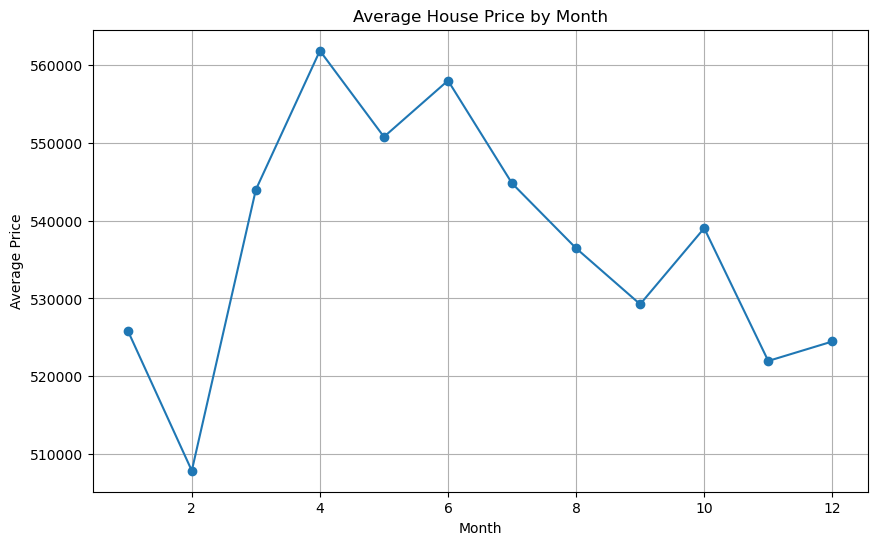

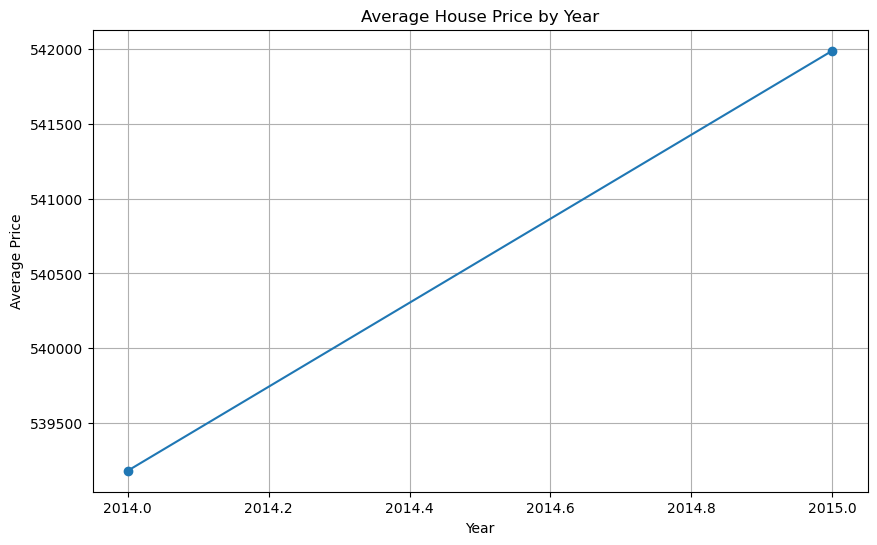

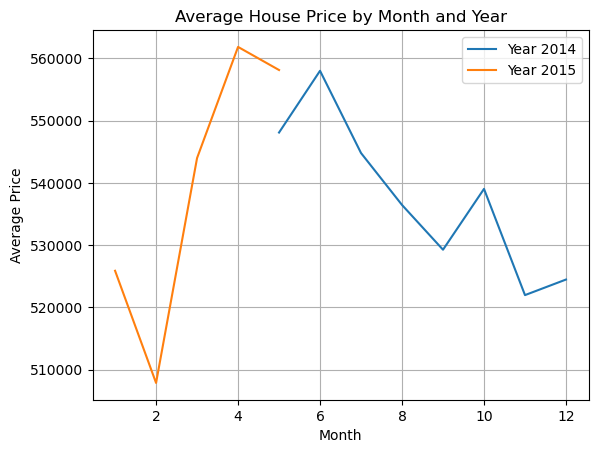

<string>:55: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.


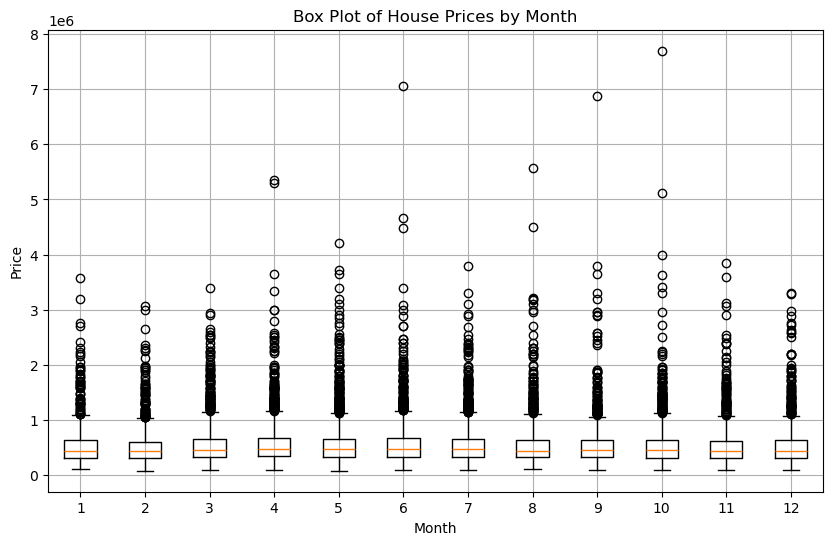

In [53]:
analysis_prompt = "Explain the seasonal trends in house prices, if any."


run_analysis_prompt(dataset_description, analysis_prompt)